# Cho dữ liệu children_lung.txt. Bộ dữ liệu có 345 trẻ em từ 1 đến 10 tuổi. 
# Với output y = forced exhalation volume (FEV), thước đo lượng không khí mà ai đó có thể buộc phải thở ra từ phổi của họ và x = age in years. 

(Nguồn dữ liệu: Dữ liệu ở đây là một phần của bộ dữ liệu được đưa ra trong Kahn, Michael (2005). 
"An Exhalent Problem for Teaching Statistics", The Journal of Statistical Education, 13".
 
# Yêu cầu:

## Đọc dữ liệu, tiền xử lý dữ liệu, tổng quan ban đầu về dữ liệu.
## Trực quan hóa dữ liệu. Quan sát và nhận xét. Có thấy vấn đề gì đặc biệt từ dữ liệu không? Nếu có thì đó là gì?

## Từ câu 2, xem xét việc tách bài toán này thành 2 phần có được không? Nếu được thì triển khai.

## Gợi ý, dữ liệu phần 1
* Thực hiện Simple Linear Regression để dự đoán FEV từ age. Nhận xét kết quả. Trực quan hóa kết quả.
* Cho age lần lượt là: [2, 3, 4, 5]. Hãy cho biết FEV lần lượt là bao nhiêu?
* Đánh giá mô hình vừa xây dựng: có cần phải cải tiến gì không? Nếu cần thì thay đổi mô hình.
* Nhận xét kết quả. Trực quan hóa kết quả với mô hình mới thay đổi. 
* So sánh với mô hình ban đầu. Mô hình sau có tốt hơn không? Quyết định chọn mô hình nào? Lý do?

## Gợi ý, dữ liệu phần 2
* Thực hiện Multiple Linear Regression để dự đoán FEV từ age và ht. Nhận xét kết quả. Trực quan hóa kết quả.
* Cho age và ht in year lần lượt là: age = [5, 6, 7, 8, 9], ht = [49.5,55, 57, 60, 62] . Hãy cho biết FEV lần lượt là bao nhiêu?
* Đánh giá mô hình vừa xây dựng: có cần phải cải tiến gì không? Nếu cần thì thay đổi mô hình.
* Nhận xét kết quả. Trực quan hóa kết quả với mô hình mới thay đổi. 
* So sánh với mô hình ban đầu. Mô hình sau có tốt hơn không? Quyết định chọn mô hình nào? Lý do?


download dữ liệu: link (https://newonlinecourses.science.psu.edu/stat462/node/101/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
f = open('data8/Ex1_Lung_Function_in_1_to_10_Year_Old_Children/children_lung.txt', mode='r')
text_list = f.read().split('\n')
f.close()

for i in range(len(text_list)):
    text = text_list[i]
    text_list[i] = re.sub('(\s+)', ' ', text.strip()).split(' ')

text_list.remove(text_list[-1])

lung_kid = pd.DataFrame(text_list[1:], columns=text_list[0])
lung_kid = lung_kid.apply(pd.to_numeric, axis=1)
lung_kid

,age,FEV,ht,sex,smoke
0,9.0,1.708,57.0,0.0,0.0
1,8.0,1.724,67.5,0.0,0.0
2,7.0,1.720,54.5,0.0,0.0
3,9.0,1.558,53.0,1.0,0.0
4,9.0,1.895,57.0,1.0,0.0
...,...,...,...,...,...
649,16.0,4.270,67.0,1.0,1.0
650,15.0,3.727,68.0,1.0,1.0
651,18.0,2.853,60.0,0.0,0.0
652,16.0,2.795,63.0,0.0,1.0


In [3]:
lung_kid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     654 non-null    float64
 1   FEV     654 non-null    float64
 2   ht      654 non-null    float64
 3   sex     654 non-null    float64
 4   smoke   654 non-null    float64
dtypes: float64(5)
memory usage: 25.7 KB


In [4]:
for col in lung_kid.columns:
    if len(lung_kid[col].unique()) <= 100:
        print(f'{col} ___ {len(lung_kid[col].unique())} unique values: {lung_kid[col].unique()}')
    else: print(f'{col} ___ {len(lung_kid[col].unique())} unique values')
    print()

age ___ 17 unique values: [ 9.  8.  7.  6.  5.  4.  3. 11. 10. 14. 12. 13. 15. 18. 19. 16. 17.]

FEV ___ 575 unique values

ht ___ 56 unique values: [57.  67.5 54.5 53.  61.  58.  56.  58.5 60.  54.  60.5 50.  59.  61.5
 49.  52.5 48.  62.5 65.  51.5 52.  65.5 57.5 55.  51.  62.  55.5 59.5
 69.  63.  64.5 47.  46.5 56.5 63.5 66.  64.  50.5 53.5 46.  49.5 68.
 66.5 68.5 69.5 72.  71.  67.  70.  70.5 72.5 65.4 74.  73.  71.5 73.5]

sex ___ 2 unique values: [0. 1.]

smoke ___ 2 unique values: [0. 1.]



In [5]:
lung_kid_10 = lung_kid[lung_kid['age'] < 10]
lung_kid_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     309 non-null    float64
 1   FEV     309 non-null    float64
 2   ht      309 non-null    float64
 3   sex     309 non-null    float64
 4   smoke   309 non-null    float64
dtypes: float64(5)
memory usage: 14.5 KB


In [6]:
lung_kid_10[['age', 'FEV', 'ht']].describe()

,age,FEV,ht
count,309.000000,309.000000,309.000000
mean,7.469256,2.032825,56.922330
std,1.458248,0.511557,4.408388
min,3.000000,0.791000,46.000000
25%,7.000000,1.672000,53.500000
50%,8.000000,1.987000,57.000000
75%,9.000000,2.358000,60.000000
max,9.000000,3.842000,69.000000


In [7]:
lung_kid_10['smoke'].value_counts()

smoke
0.0    308
1.0      1
Name: count, dtype: int64

### only one child aged <10 smoke

          age        ht       FEV
age  1.000000  0.773623  0.651387
ht   0.773623  1.000000  0.819886
FEV  0.651387  0.819886  1.000000



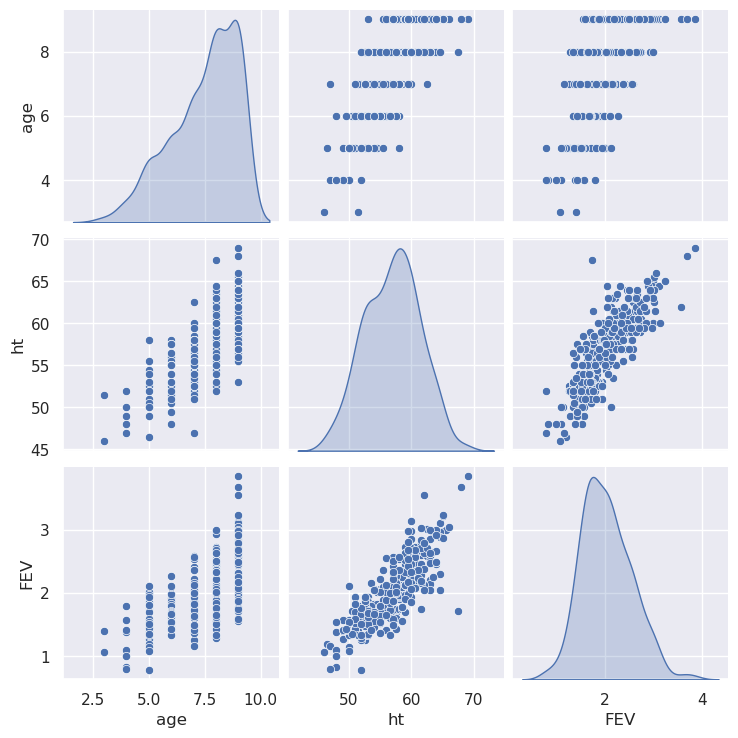

In [24]:
print(lung_kid_10[['age', 'ht', 'FEV']].corr())
print()
sbn.set_theme(style='darkgrid')
sbn.pairplot(lung_kid_10[['age', 'ht', 'FEV']], diag_kind='kde');

### All "age", "ht" and "FEV" are correlated each other
### But "ht" ~ "FEV" is stronger than "age" ~ "FEV" (0.820 > 0.651)

## <span style='color:red'>Gợi ý, dữ liệu phần 1
* Thực hiện Simple Linear Regression để dự đoán FEV từ age. Nhận xét kết quả. Trực quan hóa kết quả.
* Cho age lần lượt là: [2, 3, 4, 5]. Hãy cho biết FEV lần lượt là bao nhiêu?
* Đánh giá mô hình vừa xây dựng: có cần phải cải tiến gì không? Nếu cần thì thay đổi mô hình.
* Nhận xét kết quả. Trực quan hóa kết quả với mô hình mới thay đổi. 
* So sánh với mô hình ban đầu. Mô hình sau có tốt hơn không? Quyết định chọn mô hình nào? Lý do?

## <span style='color:blue;'> Simple Linear

In [16]:
x_simp = lung_kid_10[['age']] #Must use [[..]] (not []) to make python understands x_simp as a 2-D array (though it's just a 1-D)
y = lung_kid_10['FEV']

In [17]:
from sklearn.model_selection import train_test_split
x_train_simp, x_test_simp, y_train_simp, y_test_simp = train_test_split(x_simp, y, test_size=0.2, random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
lr_simp = LinearRegression().fit(x_train_simp, y_train_simp)

y_pred_simp = lr_simp.predict(x_test_simp)

In [39]:
print(f'Accuracy score (R^2) of Simple LR Age ~ FEV on train set: {lr_simp.score(x_train_simp, y_train_simp)}')
print(f'Accuracy score (R^2) of Simple LR AGE ~ FEV on test set: {lr_simp.score(x_test_simp, y_test_simp)}')
print()
print(f'MSE of Simple LR AGE ~ FEV: {mean_squared_error(y_test_simp, y_pred_simp)}')

Accuracy score (R^2) of Simple LR Age ~ FEV on train set: 0.42426958850601204
Accuracy score (R^2) of Simple LR AGE ~ FEV on test set: 0.4237063569826294

MSE of Simple LR AGE ~ FEV: 0.15782715508099424


### R^2 is not high, it's underfitted

Intercept of Simple LR AGE ~ FEV: 0.3437628074163963
Slope of Simple LR AGE ~ FEV: [0.22626391]



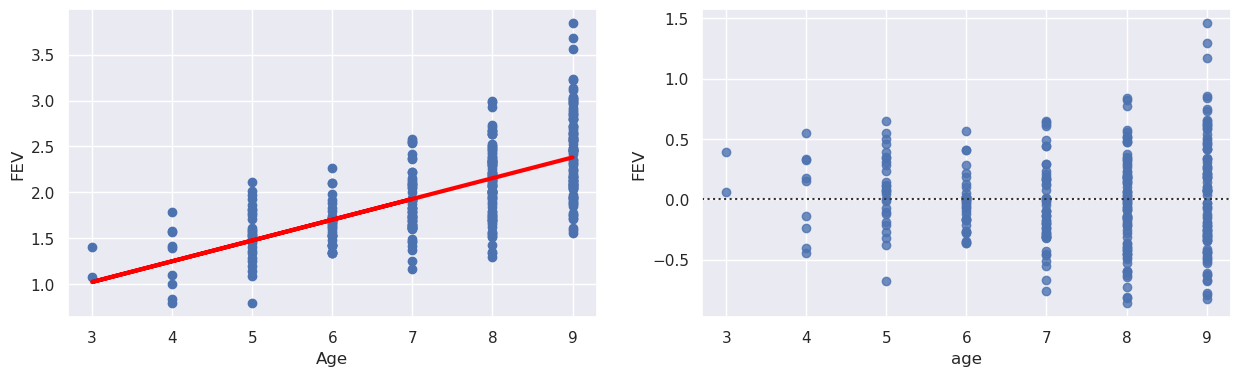

In [62]:
print(f'Intercept of Simple LR AGE ~ FEV: {lr_simp.intercept_}')
print(f'Slope of Simple LR AGE ~ FEV: {lr_simp.coef_}')
print()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(x_simp, y)
plt.plot(x_simp, lr_simp.predict(x_simp), color='red', linewidth=3)
plt.xlabel('Age')
plt.ylabel('FEV')

plt.subplot(1,2,2)
sbn.residplot(x=x_simp, y=y)
plt.show()

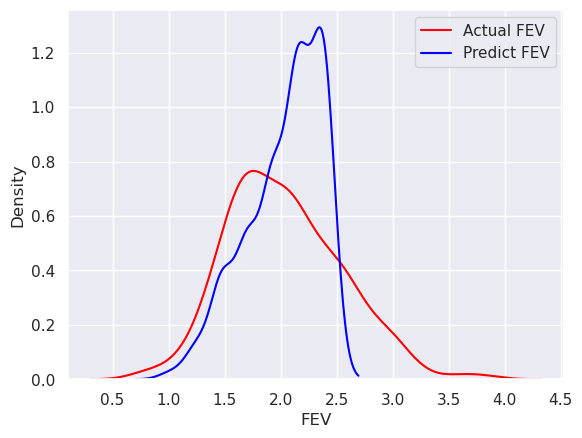

In [68]:
sbn.distplot(y, color='red', label='Actual FEV', hist=False)
sbn.distplot(lr_simp.predict(x_simp), color='blue', label='Predict FEV', hist=False)
plt.legend()
plt.show()

#Displot of Predict does not match the Actual

## <span style='color:blue;'> Simple Polynomial

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
x_simp_pf = PolynomialFeatures(degree=2).fit_transform(x_simp)

In [52]:
x_train_simp_pf, x_test_simp_pf, y_train_simp_pf, y_test_simp_pf = train_test_split(x_simp_pf, y, random_state=2)

In [53]:
lr_simp_pf = LinearRegression().fit(x_train_simp_pf, y_train_simp_pf)

y_pred_simp_pf = lr_simp_pf.predict(x_test_simp_pf)

In [60]:
print(f'Accuracy score (R^2) of Simple Poly_2 LR Age ~ FEV on train set: {lr_simp_pf.score(x_train_simp_pf, y_train_simp_pf)}')
print(f'Accuracy score (R^2) of Simple Poly_2 LR AGE ~ FEV on test set: {lr_simp_pf.score(x_test_simp_pf, y_test_simp_pf)}')
print()
print(f'MSE of Simple Poly_2 LR AGE ~ FEV: {mean_squared_error(y_test_simp_pf, y_pred_simp_pf)}')

Accuracy score (R^2) of Simple Poly_2 LR Age ~ FEV on train set: 0.48255487740882475
Accuracy score (R^2) of Simple Poly_2 LR AGE ~ FEV on test set: 0.1309890074288319

MSE of Simple Poly_2 LR AGE ~ FEV: 0.15188448775751398


### R^2 of train set increases slightly, while of test set significantly reduces, OVERFITTED, not suitable

Intercept of Simple Poly_2 LR AGE ~ FEV: 1.3978030535375323
Slope of Simple Poly_2 LR AGE ~ FEV: [ 0.         -0.11754069  0.02668158]



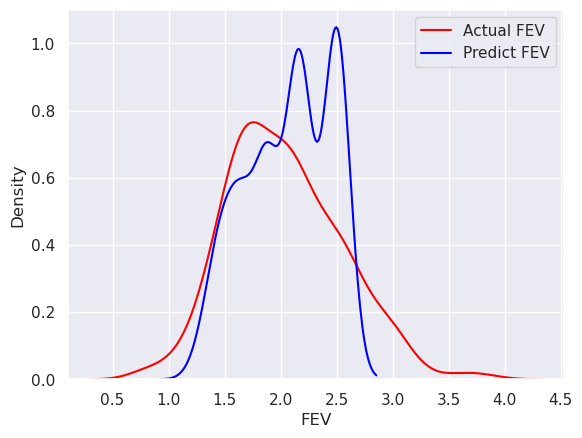

In [69]:
print(f'Intercept of Simple Poly_2 LR AGE ~ FEV: {lr_simp_pf.intercept_}')
print(f'Slope of Simple Poly_2 LR AGE ~ FEV: {lr_simp_pf.coef_}')
print()

sbn.distplot(y, color='red', label='Actual FEV', hist=False)
sbn.distplot(lr_simp_pf.predict(x_simp_pf), color='blue', label='Predict FEV', hist=False)
plt.legend()
plt.show()

#Displot of Predict does not match the Actual

## <span style='color:red'>Gợi ý, dữ liệu phần 2
* Thực hiện Multiple Linear Regression để dự đoán FEV từ age và ht. Nhận xét kết quả. Trực quan hóa kết quả.
* Cho age và ht in year lần lượt là: age = [5, 6, 7, 8, 9], ht = [49.5,55, 57, 60, 62] . Hãy cho biết FEV lần lượt là bao nhiêu?
* Đánh giá mô hình vừa xây dựng: có cần phải cải tiến gì không? Nếu cần thì thay đổi mô hình.
* Nhận xét kết quả. Trực quan hóa kết quả với mô hình mới thay đổi. 
* So sánh với mô hình ban đầu. Mô hình sau có tốt hơn không? Quyết định chọn mô hình nào? Lý do?

## <span style='color:green;'> Multi Linear

In [74]:
x_multi = lung_kid_10[['age','ht']]

x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x_multi, y, test_size=0.2, random_state=3)

In [75]:
lr_multi = LinearRegression().fit(x_train_multi, y_train_multi)

y_pred_multi = lr_multi.predict(x_test_multi)

In [76]:
print(f'Accuracy score (R^2) of Multi LR (Age, ht) ~ FEV on train set: {lr_multi.score(x_train_multi, y_train_multi)}')
print(f'Accuracy score (R^2) of Simple LR (Age, ht) ~ FEV on test set: {lr_multi.score(x_test_multi, y_test_multi)}')
print()
print(f'MSE of Simple LR (Age, ht) ~ FEV: {mean_squared_error(y_test_multi, y_pred_multi)}')

Accuracy score (R^2) of Multi LR (Age, ht) ~ FEV on train set: 0.6677326406595887
Accuracy score (R^2) of Simple LR (Age, ht) ~ FEV on test set: 0.7051708234199879

MSE of Simple LR (Age, ht) ~ FEV: 0.051680890223996065


### The R^2 has increased significantly on both train set and test set
### The MSE also decreased

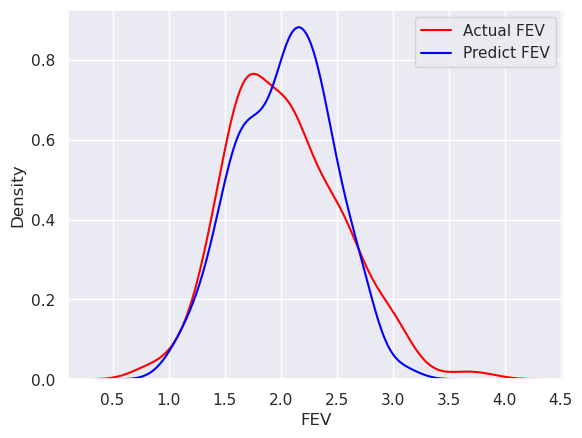

In [78]:
sbn.distplot(y, color='red', label='Actual FEV', hist=False)
sbn.distplot(lr_multi.predict(x_multi), color='blue', label='Predict FEV', hist=False)
plt.legend()
plt.show()

#Displot of Predict now matches the more closely to the Actual

## <span style='color:green;'> Multi Polynomial

In [87]:
x_multi_pf = PolynomialFeatures(degree=2).fit_transform(x_multi)

x_train_multi_pf, x_test_multi_pf, y_train_multi_pf, y_test_multi_pf = train_test_split(x_multi_pf, y, random_state=4)

lr_multi_pf = LinearRegression().fit(x_train_multi_pf, y_train_multi_pf)

y_pred_multi_pf = lr_multi_pf.predict(x_test_multi_pf)

In [88]:
print(f'Accuracy score (R^2) of Multi Poly_2 LR (Age, ht) ~ FEV on train set: {lr_multi_pf.score(x_train_multi_pf, y_train_multi_pf)}')
print(f'Accuracy score (R^2) of Multi Poly_2 LR (Age, ht) ~ FEV on test set: {lr_multi_pf.score(x_test_multi_pf, y_test_multi_pf)}')
print()
print(f'MSE of Multi Poly_2 LR (Age, ht) ~ FEV: {mean_squared_error(y_test_multi_pf, y_pred_multi_pf)}')

Accuracy score (R^2) of Multi Poly_2 LR (Age, ht) ~ FEV on train set: 0.6877399580249257
Accuracy score (R^2) of Multi Poly_2 LR (Age, ht) ~ FEV on test set: 0.6287152842169046

MSE of Multi Poly_2 LR (Age, ht) ~ FEV: 0.09839805363499747


### Accuracy on train set increases, but on test set decreases => OVERFITTED
### MSE also increased

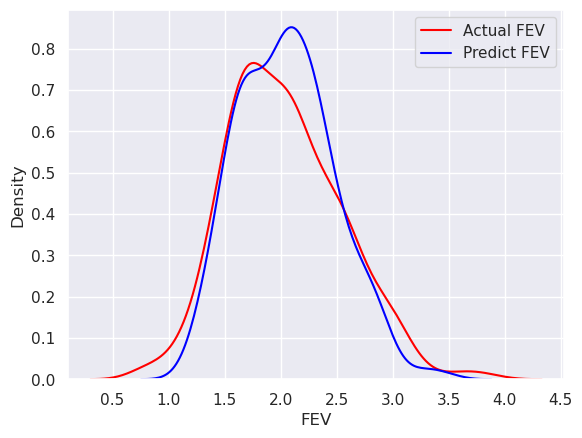

In [89]:
sbn.distplot(y, color='red', label='Actual FEV', hist=False)
sbn.distplot(lr_multi_pf.predict(x_multi_pf), color='blue', label='Predict FEV', hist=False)
plt.legend()
plt.show()

#Displot of Predict now matches the more closely to the Actual

## Cho age lần lượt là: [2, 3, 4, 5]. Hãy cho biết FEV lần lượt là bao nhiêu?
## Simple Linear

In [99]:
input_new_simp = pd.DataFrame({'age':[2, 3, 4, 5]})
fev_pred_simp = lr_simp.predict(input_new_simp)

for age, fev in zip(input_new_simp.age, fev_pred_simp):
    print(f'With age = {age} then FEV = {fev}')

With age = 2 then FEV = 0.7962906189035159
With age = 3 then FEV = 1.022554524647076
With age = 4 then FEV = 1.2488184303906356
With age = 5 then FEV = 1.4750823361341956


## Cho age và ht in year lần lượt là: age = [5, 6, 7, 8, 9], ht = [49.5,55, 57, 60, 62] . Hãy cho biết FEV lần lượt là bao nhiêu?
## Multi Linear

In [100]:
input_new_multi = pd.DataFrame({
    'age':[5, 6, 7, 8, 9],
    'ht':[49.5,55, 57, 60, 62]
})

fev_pred_multi = lr_multi.predict(input_new_multi)

for age, ht, fev in zip(input_new_multi.age, input_new_multi.ht, fev_pred_multi):
     print(f'With age = {age} and ht = {ht} then FEV = {fev}')

With age = 5 and ht = 49.5 then FEV = 1.3070901795687613
With age = 6 and ht = 55.0 then FEV = 1.8298678298572604
With age = 7 and ht = 57.0 then FEV = 2.03082629454786
With age = 8 and ht = 60.0 then FEV = 2.3237330979807167
With age = 9 and ht = 62.0 then FEV = 2.5246915626713156
